#Comparing Emission Measure Curves in EBTEL: Single-fluid versus Multi-fluid

In [57]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
single_fluid_root = '/Users/willbarnes/Documents/Rice/Research/EBTEL_repo/'
two_fluid_root = '/Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/'
import sys
sys.path.append(single_fluid_root+'bin/')
sys.path.append(two_fluid_root+'bin/')
import ebtel_wrapper as sfw
import ebtel2fl_run as tfw
import ebtel2fl_plot as tfp
reload(sfw)
reload(tfw)

<module 'ebtel2fl_run' from '/Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/bin/ebtel2fl_run.pyc'>

One problem that is persisting in the EBTEL two-fluid DEM analysis is inconsistencies between our results and those of Cargill (2014). One possible reason for this could be the use of differing radiative loss functions (see radiative loss function notebook), but this is unclear.

In Cargill (2014), much higher peak emission temperatures are seen as compared to those computed by the two-fluid EBTEL code. Here, we will run two simulations: one using the single-fluid EBTEL C code and another using the two-fluid EBTEL code. Additionally, we will also import data from an EBTEL-IDL run and compare this against the other two.

Each run will consist of a single heating event with parameters consistent with those used for the single-event emission curve shown in Cargill (2014).

##Input Parameters

Let's first build our dictionary of initial conditions to print our config files for both our single- and two-fluid runs. A few extra parameters will need to be added to the two-fluid section which will not affect the single-fluid run.

In [58]:
#build input dictionary
#Configure all static dictionary options
config_dict = {'usage_option':'dem','rad_option':'rk','dem_option':'new','heat_flux_option':'limited','solver':'euler','ic_mode':'st_eq'}
config_dict['output_file'] = single_fluid_root+'data/em_testing'
config_dict['total_time'] = 5000
config_dict['tau'] = 1.0
config_dict['rka_error'] = 1.0e-6
config_dict['index_dem'] = 451
config_dict['sat_limit'] = 0.166667
config_dict['h_back'] = 3.4e-6
config_dict['heating_shape'] = 'triangle'
config_dict['t_start_switch'] = 'uniform'
config_dict['t_end_switch'] = 'uniform'
config_dict['T0'] = 1.0e+6
config_dict['n0'] = 1.0e+8
config_dict['t_start'] = 50.0
config_dict['t_pulse_half'] = 50.0
config_dict['mean_t_start'] = 1000
config_dict['std_t_start'] = 1000

#Configure directory-level parameters
config_dict['num_events'] = 1
config_dict['heat_species'] = 'electron'
config_dict['amp_switch'] = 'uniform'
config_dict['alpha'] = -1.5
config_dict['loop_length'] = 40.0
config_dict['amp0'] = 0.05
config_dict['amp1'] = 0.5
config_dict['h_nano'] = 0.38

##Single-fluid EBTEL-C Run

First, we'll print a configuration file for an EBTEL run.

In [59]:
sfw.print_xml_config(config_dict,config_file=single_fluid_root+'config/em_testing_config.xml')

Now, let's run the single-fluid code using the inputs that we just configured.

In [60]:
sfw.run_ebtel(single_fluid_root+'bin/',single_fluid_root+'config/',config_file='em_testing_config.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)                       
************************************************************************************

Original code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 5000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Solving equations using Euler method
Using Raymond-Klimchuk Loss Function
Using limited method to calculate the heat flux
Using new method to calculate DEM in the TR


Finally, let's load the EM data for the single-fluid case so we can plot it later and compare all of our cases.

In [61]:
temp = np.loadtxt(single_fluid_root+'data/em_testing_dem.txt')
sf_tdem = temp[:,0]
sf_em = temp[:,4]

Just to make sure that our run completed without any problems, let's look at the resulting $T$ and $n$ profiles.

<IPython.core.display.Javascript object>


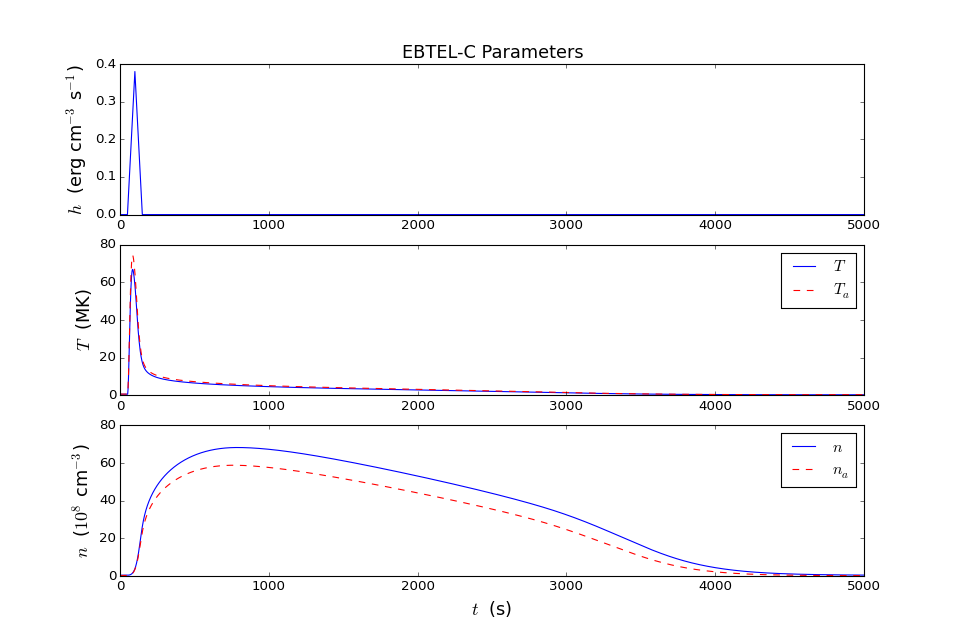

In [62]:
sfw.plot_ebtel(single_fluid_root+'data/','em_testing.txt')

##Two-fluid EBTEL Run

Now we're going to run the two-fluid EBTEL code. Again, we'll print the configuration file and then run the code, save the data, and output the $T$ and $n$ profiles just to provide an extra check.

In [63]:
#print configuration file
config_dict['output_file'] = two_fluid_root+'data/em_testing'
sfw.print_xml_config(config_dict,config_file=two_fluid_root+'config/em_testing_config.xml')

In [64]:
#run the simulation
runner = tfw.Runner(two_fluid_root+'bin/',two_fluid_root+'config/')
runner.run_ebtel_single('em_testing_config.xml')

************************************************************************************
            		Initial Conditions		                       
************************************************************************************
Te(t = 0) = 546389.500337 K
Ti(t = 0) = 546389.500337 K
n(t = 0) = 40332246.245217 cm^-3
pe(t = 0) = 0.003041 dyne cm^-2
pi(t = 0) = 0.003041 dyne cm^-2
r3(t = 0) = 10.025657

The results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing.txt
The DEM results were printed to the file /Users/willbarnes/Documents/Rice/Research/EBTEL-2fluid_repo/data/em_testing_dem.txt
Number of simulated heating events: 1
The process took 1082.000000 milliseconds to run


In [65]:
#load data
temp = np.loadtxt(config_dict['output_file']+'_dem.txt')
tf_tdem = temp[:,0]
tf_em = temp[:,4]

Unable to load heating event amplitudes.


<IPython.core.display.Javascript object>


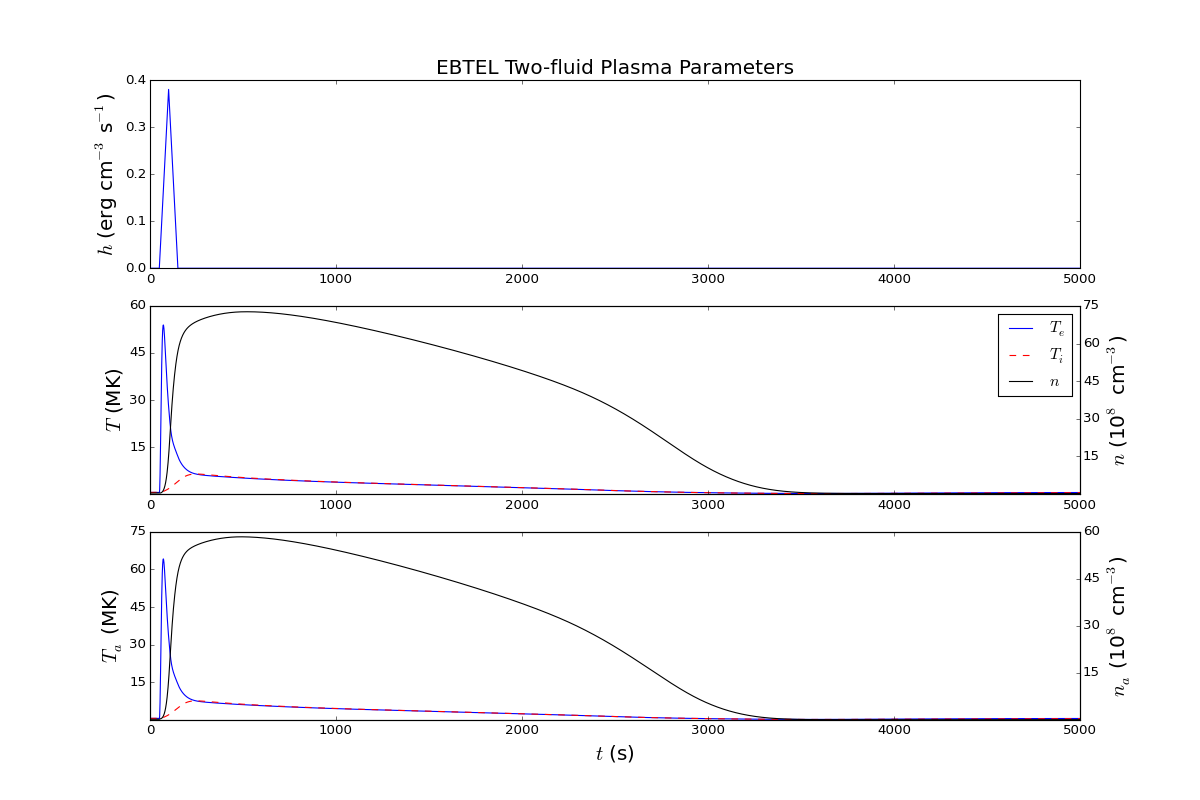

In [66]:
plotter=tfp.Plotter(parent_dir=two_fluid_root+'data/',child='em_testing')
plotter.plot_params()

##Emission Measure Comparison

Now, let's plot these two curves on top of each other and see how they match up.

<IPython.core.display.Javascript object>


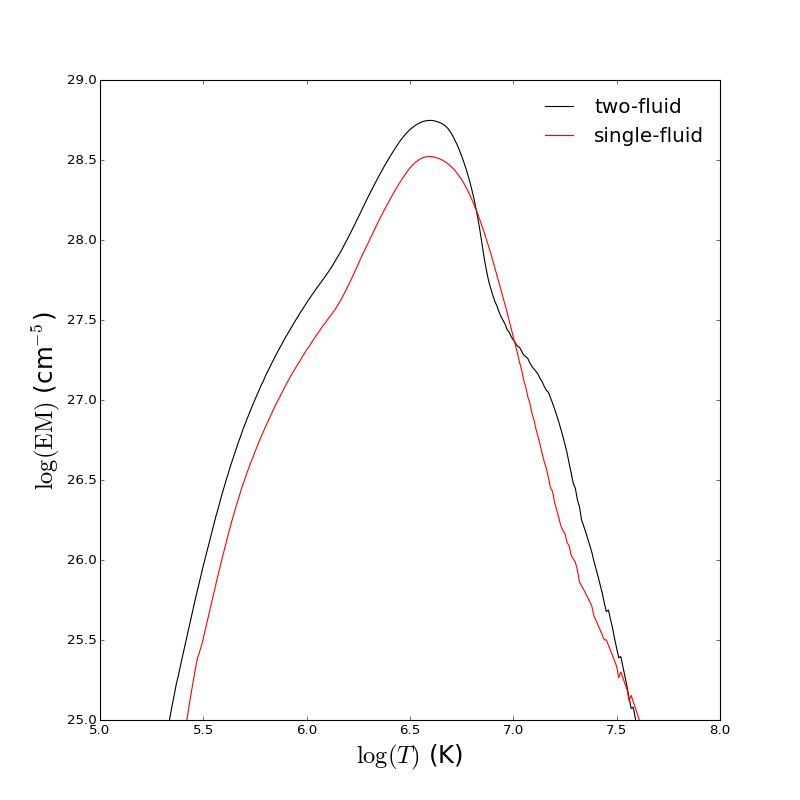

In [67]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(tf_tdem,tf_em,'k',label=r'two-fluid')
ax.plot(sf_tdem,sf_em,'r',label=r'single-fluid')
ax.set_xlim([5.0,8.0])
ax.set_ylim([25,29])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)

##Comparison to Original EBTEL Model

The original EBTEL code (available <a href="https://github.com/rice-solar-physics/EBTEL">here</a>) was run in IDL outside of this notebook using the same parameters as above. Below, we will plot the typical plasma parameters and then load the EM curve and plot it on top of the above curves.

<IPython.core.display.Javascript object>


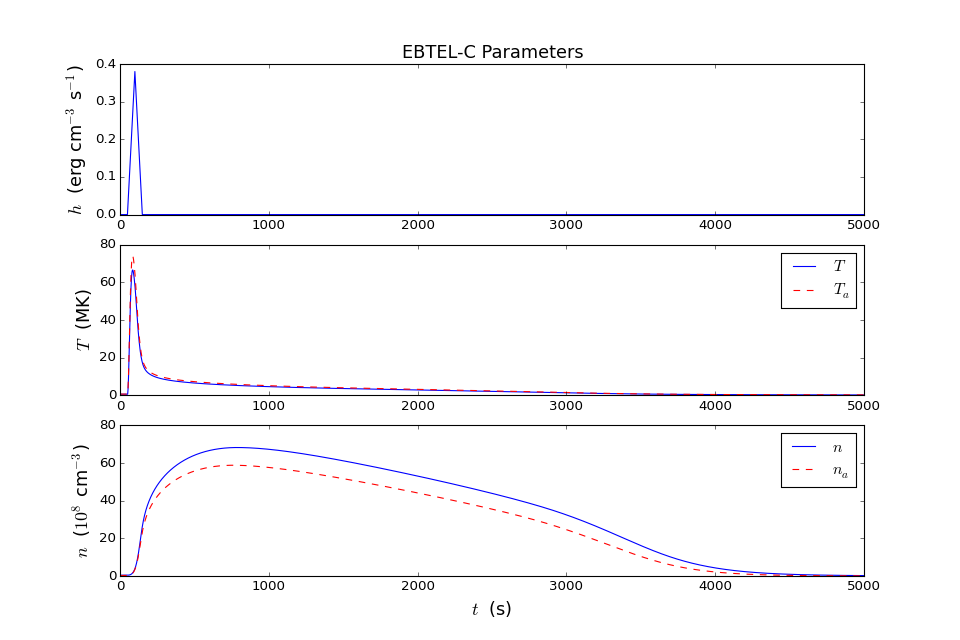

In [68]:
sfw.plot_ebtel('ebtel_data/','em_testing.txt')

Now, let's plot all of our EM curves on top of each other to see how our single- and two-fluid simulations compare. 

In [69]:
temp = np.loadtxt('ebtel_data/em_testing_dem.txt')
sf_old_tdem = temp[:,0]
sf_old_em = np.log10(temp[:,3])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


<IPython.core.display.Javascript object>


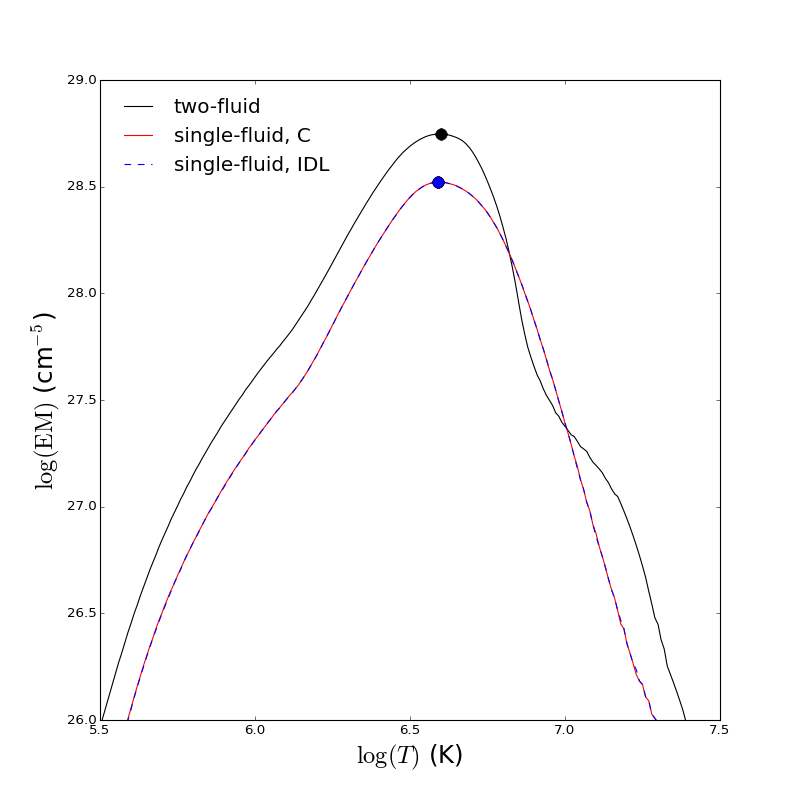

Peak EM temperature for two-fluid EBTEL code: 6.600
Peak EM temperature for single-fluid EBTEL C code: 6.590
Peak EM temperature for single-fluid EBTEL code: 6.590


In [70]:
fig=plt.figure(figsize=(10,10))
ax = fig.gca()
#plot em curves
ax.plot(tf_tdem,tf_em,'k',label=r'two-fluid')
ax.plot(sf_tdem,sf_em,'r',label=r'single-fluid, C')
ax.plot(sf_old_tdem,sf_old_em,'--b',label=r'single-fluid, IDL')
#plot max temperatures
ax.plot(tf_tdem[np.argmax(tf_em)],np.max(tf_em),'ok',markersize=10)
ax.plot(sf_tdem[np.argmax(sf_em)],np.max(sf_em),'or',markersize=10)
ax.plot(sf_old_tdem[np.argmax(sf_old_em)],np.max(sf_old_em),'ob',markersize=10)
#print temperatures
print "Peak EM temperature for two-fluid EBTEL code: %.3f"%tf_tdem[np.argmax(tf_em)]
print "Peak EM temperature for single-fluid EBTEL C code: %.3f"%sf_tdem[np.argmax(sf_em)]
print "Peak EM temperature for single-fluid EBTEL code: %.3f"%sf_old_tdem[np.argmax(sf_old_em)]
#set plot properties
ax.set_xlim([5.5,7.5])
ax.set_ylim([26,29])
ax.set_xlabel(r'$\log (T)$ (K)',fontsize=22)
ax.set_ylabel(r'$\log(\mathrm{EM})$ (cm$^{-5}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)
plt.show()

##Density Evolution Comparison

It's obvious that the EM varies significantly between the single- and two-fluid cases in the temperature regime $5.5\lesssim \log{T}\lesssim7.0$. We would like to be able to explain this through the differences between our temperature and density evolutions. Since $\mathrm{EM}=n^2\mathrm{d}l$, the EM evolution is largely determined by the density evolution. Let's compare $n(t)$ for the single- and two-fluid cases.

In [71]:
#load single fluid ebtel-C T and n profiles
temp = np.loadtxt(single_fluid_root+'data/em_testing.txt')
sf_t = temp[:,0]
sf_T = temp[:,1]
sf_n = temp[:,2]
#load single fluid ebtel-IDL T and n profiles
temp = np.loadtxt('ebtel_data/em_testing.txt')
sf_idl_t = temp[:,0]
sf_idl_T = temp[:,1]
sf_idl_n = temp[:,2]

<IPython.core.display.Javascript object>


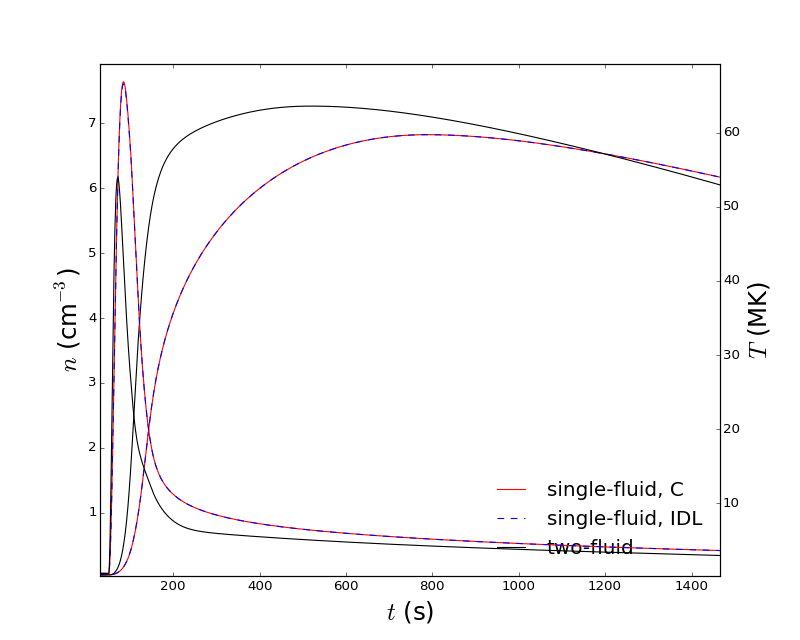

In [73]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
tax = ax.twinx()
ax.plot(sf_t,sf_n/10**9,'r',label=r'single-fluid, C')
ax.plot(sf_idl_t,sf_idl_n/10**9,'--b',label=r'single-fluid, IDL')
ax.plot(plotter.time,plotter.dens/10**9,'k',label=r'two-fluid')
tax.plot(sf_t,sf_T/10**6,'r')
tax.plot(sf_idl_t,sf_idl_T/10**6,'--b')
tax.plot(plotter.time,plotter.temp_e/10**6,'k')
tax.set_ylabel(r'$T$ (MK)',fontsize=22)
ax.set_xlabel(r'$t$ (s)',fontsize=22)
ax.set_ylabel(r'$n$ (cm$^{-3}$)',fontsize=22)
lg = ax.legend(loc='best',fontsize=18)
lg.draw_frame(False)
plt.show()